In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
iris = load_iris()
X = iris.data        
y = iris.target      


In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [8]:
X_train_lda

array([[ 6.67507649e+00,  1.00525785e+00],
       [-4.64710084e+00,  6.66280882e-01],
       [-2.37659498e+00,  8.12628205e-01],
       [ 7.45112820e+00,  9.07150101e-01],
       [-1.86304626e+00,  1.12657025e+00],
       [-5.07515644e+00,  2.04788565e-01],
       [-1.95175304e+00,  9.61822429e-01],
       [-3.79052121e+00,  1.02258944e+00],
       [-6.72773913e+00, -1.09826351e+00],
       [-6.71191796e+00, -1.56012942e+00],
       [-7.41769950e+00,  1.77041579e-01],
       [-2.54582969e+00,  1.93464074e-01],
       [-1.04640517e+00,  2.56434643e+00],
       [-7.20556662e-01,  1.72294088e+00],
       [-1.17829305e+00,  1.15826923e+00],
       [ 6.90703478e+00,  5.88213576e-01],
       [ 8.06326148e+00, -1.11069711e+00],
       [-6.27469708e+00,  1.37383611e+00],
       [-5.01912587e+00, -3.30835573e-02],
       [ 7.50172820e+00, -7.64969291e-01],
       [-3.75117571e+00,  1.34476808e+00],
       [ 8.10754845e+00, -6.72590085e-01],
       [-5.29564198e+00, -1.35960772e+00],
       [ 6.

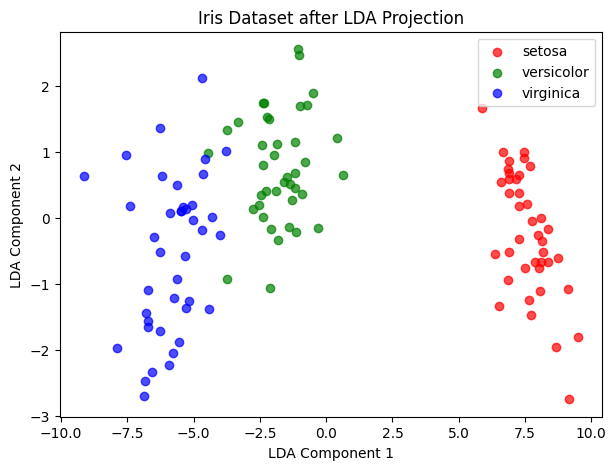

In [9]:
plt.figure(figsize=(7,5))

for label, color, name in zip([0,1,2], ['red','green','blue'], iris.target_names):
    plt.scatter(
        X_train_lda[y_train == label, 0],
        X_train_lda[y_train == label, 1],
        color=color,
        label=name,
        alpha=0.7
    )


plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.title("Iris Dataset after LDA Projection")
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

accuracy = clf.score(X_test_lda, y_test)
print("LDA + Logistic Regression Accuracy:", accuracy)


LDA + Logistic Regression Accuracy: 1.0


In [11]:
print("Class means shape:", lda.means_.shape)      
print("Scalings (W) shape:", lda.scalings_.shape)  


Class means shape: (3, 4)
Scalings (W) shape: (4, 2)


In [12]:
X_train_lda[0, 1]

1.005257847072334